<a href="https://colab.research.google.com/github/yesol-ba/portfolio/blob/main/Framinghem%20Heart%20Study%20-%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

## Question 1 (12 points)
Using the [Framingham Heart Study dataset](https://github.com/soltaniehha/Intro-to-Data-Analytics/blob/main/data/AnalyticsEdge-Datasets/Framingham.csv) create a **logistic regression** model to predict whether a patient will develop heart desease in 10 years or not.

Follow the steps outlined in the [Classification notebook](https://github.com/soltaniehha/Intro-to-Data-Analytics/blob/main/08-Machine-Learning-Overview/03-Classification.ipynb):
* Preprocessing: deleting columns with no predictive power/handling missing values
* Preprocessing: handle categorical variables, if any
* Create feature matrix and target vector. Our target variable is `TenYearCHD`
* Split the data randomly into train and test with a 70-30 split (use `random_state=780`)
* Instantiate and fit a logistic regression model
* Make predictions and find the overall accuracy, sensitivity, and specificity on your test set

**Note:** We have seen this dataset during the discussion on the Framingham Heart Study from Analytics Edge.

## Question 2 (8 points)
Open ended - Do further data exploration and create new variables when possible (feature engineering). Show your discovery process using plots and summaries. 
* How does the model performance change by adding new variables or potentially removing some of the less important ones? 
* How does the model performance change by trying different classification models?

---

### Upload your .ipynb file to Questrom Tools

A potential issue is to download the notebook before it was fully saved. To avoid this, follow these steps: 
1. go to Runtime (in the menu) and hit "Restart and run all..." 
2. after the notebook is fully run, save it and then download your .ipynb to your computer 
3. upload it back to your Drive and open it with Colab to ensure all of your recent changes are there 
4. upload the originally downloaded file to Questrom Tools.

---

The data has been loaded in the following cell:

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/Intro-to-Data-Analytics/master/data/AnalyticsEdge-Datasets/Framingham.csv')
df.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [ ]:
print(df.shape)
print(df.info())

(4240, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
No

# Question 1

## Preprocessing

### Handling missing values

In [ ]:
# Check the number of missing value

df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

**cigsPerDay**

The column cigsPerDay has 29 missing values. This column is related with currentSmoker column. So I will check missing values by whether a person is smoker or not.

In [ ]:
print(df[df["currentSmoker"] == 0]["cigsPerDay"].isna().sum())
print(df[df["currentSmoker"] == 1]["cigsPerDay"].isna().sum())

0
29


Only smokers have missing values in cigsPerDay column. When I checked describtive statistics, cigsPerDay column has outlier of 70, which means a person smokes 70 cigaretts per day. This data can 

In [ ]:
med_cigs = df[df["currentSmoker"] == 1]["cigsPerDay"].median()
df["cigsPerDay"].fillna(med_cigs, inplace=True)

df["cigsPerDay"].isna().sum()

0

**BPMeds**

In [ ]:
bp_meds = df["BPMeds"].value_counts().to_frame()
bp_meds

,BPMeds
0.0,4063
1.0,124


The majority of data points have 0 in BPMeds. Therefore I will replace missing values with 0.

In [ ]:
df["BPMeds"].fillna(0, inplace=True)
df["BPMeds"].isna().sum()

0

**totChol**
Cholesterol 

In [ ]:
df["totChol"].describe()

count    4190.000000
mean      236.699523
std        44.591284
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64

In [ ]:
import numpy as np

pd.pivot_table(data=df, index="currentSmoker", values="totChol", aggfunc=np.mean)

,totChol
currentSmoker,
0,238.741769
1,234.595930


In [ ]:
pd.pivot_table(data=df, index="currentSmoker", values="totChol", aggfunc=np.median)

,totChol
currentSmoker,
0,235.5
1,232.0


In [ ]:
df["totChol"].fillna(df["totChol"].median(), inplace=True)
df["totChol"].isna().sum()

0

BMI

In [ ]:
df["BMI"].describe()

count    4221.000000
mean       25.800801
std         4.079840
min        15.540000
25%        23.070000
50%        25.400000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [ ]:
df["BMI"].fillna(df["BMI"].median(), inplace=True)
df["BMI"].isna().sum()

0

**Heartrate**

In [ ]:
df[df["heartRate"].isna() == True]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
689,1,64,1.0,1,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,NaN,91.0,1


In [ ]:
df["heartRate"].fillna(df["heartRate"].median(), inplace=True)
df["heartRate"].isna().sum()

0

**glucose**

In [ ]:
df["glucose"].describe()

count    3852.000000
mean       81.963655
std        23.954335
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [ ]:
df["glucose"].fillna(df["glucose"].median(), inplace=True)
df["glucose"].isna().sum()

0

**Education**

Education column has 105 missing values. I filled these missing values with the most frequently occuring value.

In [ ]:
df["education"].value_counts()

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

In [ ]:
df["education"].fillna(1.0, inplace=True)
df["education"].isna().sum()

0

Since education is categorical data, it needs to be dummy variables.

In [ ]:
df = pd.get_dummies(df, columns=["education"], drop_first=True)

In [ ]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_2.0,education_3.0,education_4.0
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0,1
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,0,0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,1,0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,1,0


### Deleting columns

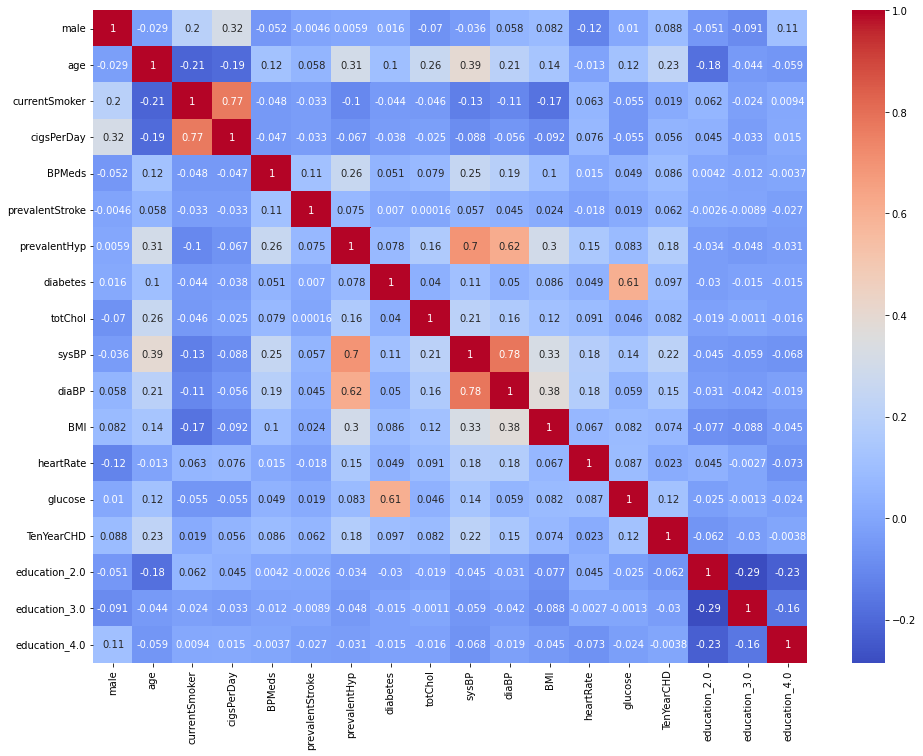

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

As you can see in the correlation chart here, all variables have absolute value of correlation greater than 0. In question 1, therefore, I will use all features for modeling and try selecting features in question 2.

## Modeling

### Feature matrix and Target array

In [ ]:
X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]

In [ ]:
print(X.shape, y.shape)

(4240, 17) (4240,)


### Train - Test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=780)

In [ ]:
print(X_train.shape, y_train.shape)

(2968, 17) (2968,)


In [ ]:
print(X_test.shape, y_test.shape)

(1272, 17) (1272,)


### Initiate Logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [ ]:
# fit train data

logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting and Computing KPIs

### Predict and compute KPIs

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("This model's accuracy score is {}".format(accuracy))

This model's accuracy score is 0.8474842767295597


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[1068,    5],
       [ 189,   10]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

1068 5 189 10


Sensitivity = True Positive / Positive


Specificity = True Negative / Negative

In [ ]:
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

In [ ]:
print("The sensitivity of this model is {}".format(sensitivity))
print("The speficifity of this model is {}".format(specificity))

The sensitivity of this model is 0.05025125628140704
The speficifity of this model is 0.9953401677539608


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print(auc)

0.5227957120176839


# Question 2.1 Feature Selection

In question 2 - part 1, I will use only the top 10 features in terms of chi-squared (chi²) statistical test scores. Then build a logistic regression model and compare KPIs with the model made in Question 1.

## Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']

print(featureScores.nlargest(10,'Score'))

        Features       Score
9          sysBP  727.935535
13       glucose  399.565953
1            age  319.266019
8        totChol  235.210225
3     cigsPerDay  208.015062
10         diaBP  152.748563
6   prevalentHyp   92.048736
7       diabetes   39.144944
4         BPMeds   30.759595
0           male   18.899930


## Modeling

### Feature matrix and Target array

I made the new feature matrix called X2 with the top 10 features, and for Target array, I will use the one made in question 1.

In [ ]:
X2 = df[["sysBP", "glucose", "age", "totChol", "cigsPerDay", "diaBP", "prevalentHyp", "diabetes", "BPMeds", "male"]]

### Train - Test split

In [ ]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=780)

In [ ]:
print(X2_train.shape, y_train.shape)

(2968, 10) (2968,)


In [ ]:
print(X2_test.shape, y_test.shape)

(1272, 10) (1272,)


### Initiate Logistic regression model

In [ ]:
logreg2 = LogisticRegression()
logreg2.fit(X2_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting and Computing KPIs

In [ ]:
y_pred2 = logreg2.predict(X2_test)

In [ ]:
accuracy2 = accuracy_score(y_test, y_pred2)

print("This model's accuracy score is {}".format(accuracy2))

This model's accuracy score is 0.8482704402515723


In [ ]:
confusion_matrix(y_test, y_pred2)

array([[1072,    1],
       [ 192,    7]])

In [ ]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred2).ravel()
print(tn2, fp2, fn2, tp2)

1072 1 192 7


In [ ]:
sensitivity2 = tp2 / (tp2 + fn2)
specificity2 = tn2 / (tn2 + fp2)

print("The sensitivity of this model is {}".format(sensitivity2))
print("The speficifity of this model is {}".format(specificity2))

The sensitivity of this model is 0.035175879396984924
The speficifity of this model is 0.9990680335507922


In [ ]:
auc2 = roc_auc_score(y_test, y_pred2)

In [ ]:
accuracy2 - accuracy

0.0007861635220125507

In [ ]:
sensitivity2 - sensitivity

-0.015075376884422113

In [ ]:
specificity2 - specificity

0.0037278657968313755

Feature selection using chi2 score increased accuracy only by 0.0007. We can say that these two models are very similar in terms of accuracy.
Feature selections, on the other hand, made big difference in sensitivity and specificity. Sensitivity decreased by 0.63 and specificity increased by 0.15. Considering the purpose of this model, which is to find people who are likely to have heart disease in 10 years, sensitivity is a more important KPI. Therefore the initial model from question 1 is the better model.

# Question 2.2 Try Different Models

In question 2 - part 2, I will build several classification models and compare the KPIs with the model made in question 1. Here I plan to use all features.

### K nearest neighbors

Cross validation with GridSearch

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1,51))}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
knn_cv.fit(X_train, y_train)

knn_cv.best_params_


{'n_neighbors': 10}

Initiate the model & Fit

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

Predict and compute KPIs

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("This model's accuracy score is {}".format(accuracy_knn))

This model's accuracy score is 0.8459119496855346


In [ ]:
confusion_matrix(y_test, y_pred_knn)

array([[1067,    6],
       [ 190,    9]])

In [ ]:
tn3, fp3, fn3, tp3 = confusion_matrix(y_test, y_pred_knn).ravel()
print(tn3, fp3, fn3, tp3)

1067 6 190 9


In [ ]:
sensitivity_knn = tp3 / (tp3 + fn3)
specificity_knn = tn3 / (tn3 + fp3)

print("The sensitivity of this model is {}".format(sensitivity_knn))
print("The speficifity of this model is {}".format(specificity_knn))

The sensitivity of this model is 0.04522613065326633
The speficifity of this model is 0.994408201304753


In [ ]:
auc_knn = roc_auc_score(y_test, y_pred_knn)

### Random Forest Classifier

Cross validation with gridsearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
rf_params = {'n_estimators': [5,10,20,30,50],
               'max_features': [3,5,10,17],
               'max_depth': [3,5,10,20],
               'min_samples_split': [2,5,10],
               'min_samples_leaf': [1,2,4],
               'bootstrap': [True, False]}

In [ ]:
rf_cv = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
rf_cv.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 20}

Initiate the model and fit train data

In [ ]:
rf = RandomForestClassifier(n_estimators=30, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=10, bootstrap=True)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Predict and compute KPIs

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("This model's accuracy score is {}".format(accuracy_rf))

This model's accuracy score is 0.845125786163522


In [ ]:
confusion_matrix(y_test, y_pred_knn)

array([[1067,    6],
       [ 190,    9]])

In [ ]:
tn4, fp4, fn4, tp4 = confusion_matrix(y_test, y_pred_rf).ravel()
print(tn4, fp4, fn4, tp4)

1069 4 193 6


In [ ]:
sensitivity_rf = tp4 / (tp4 + fn4)
specificity_rf = tn4 / (tn4 + fp4)

print("The sensitivity of this model is {}".format(sensitivity_rf))
print("The speficifity of this model is {}".format(specificity_rf))

The sensitivity of this model is 0.03015075376884422
The speficifity of this model is 0.9962721342031687


In [ ]:
auc_rf = roc_auc_score(y_test, y_pred_rf)

# Conclusion

In this assignment, I build 4 different classification models using multiple algorithms.

*   Logistic regression with all features in my cleaned data
*   Logistic regression with 10 selected features
*   K nearest neighbor with all features
*   Random forest with all features



In [ ]:
lst = [['Logistic regression (all features)', accuracy, sensitivity, specificity, auc],
       ['Logistic regression (10 features)', accuracy2, sensitivity2, specificity2, auc2],
       ['K nearest neighbor', accuracy_knn, sensitivity_knn, specificity_knn, auc_knn],
       ['Random Forest', accuracy_rf, sensitivity_rf, specificity_rf, auc_rf]]

kpis = pd.DataFrame(lst, columns =['Model', 'Accuracy', 'Sensitivity', 'Specificity', 'AUC'], dtype = float)

kpis

,Model,Accuracy,Sensitivity,Specificity,AUC
0,Logistic regression (all features),0.847484,0.050251,0.995340,0.522796
1,Logistic regression (10 features),0.848270,0.035176,0.999068,0.517122
2,K nearest neighbor,0.845912,0.045226,0.994408,0.519817
3,Random Forest,0.845126,0.030151,0.996272,0.513211


In terms of accuracy, the logistic regression using TOP 10 features performs best. However, the logistic regression with all features achieved the highest sensitivity.